   # Document clustering using k-means using sklearn

In [1]:
import string
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.image import ImageWriter
from pdfminer.layout import LAParams

import io
import os

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

import json
from pathlib import *

import time

from random import randint

from nltk.corpus import wordnet

import operator

from nltk.chunk import tree2conlltags
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import re

import numpy as np

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pooja Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Pooja
[nltk_data]     Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Pooja
[nltk_data]     Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
def pdfRender():
    global documentSet
    global mydoc
    mydoc ={}
    pdf_files =[]
    allLines =[]
    FILE_PATH = Path(r'E:\MasterThesis\FinalPapers\testData_91')
    #FILE_PATH = Path('E:/MasterThesis/FinalPapers')
    pdf_files = list(FILE_PATH.glob('*.pdf'))
    #An Array which stores the full text of each document
    documentSet = pdfparser(pdf_files)
    mydoc = dict(zip(pdf_files,documentSet))
    #print(len(documentSet))
    return documentSet

In [3]:
def pdfparser(pdffileS):
    global finalDocumentSet
    finalDocumentSet = []
    global pdfEx
    pdfEx = []
    global fullText
    for pdffile in pdffileS:
        #full= fullText
        # Create a example words list(Please add all the related keywords needed)
        words_list = ["Introduction", "INTRODUCTION", "Background", "BACKGROUND", "Conclusion", "Conclusions",
                      "CONCLUSION", "Acknowledgements"]
        #print(words_list)
        with open(pdffile, mode='rb') as f:
            fullText = np.array([])
            pdfName = os.path.basename(pdffile)
            print(pdfName)
            #documents = fullText
            #words_list = []
            #print(words_list)
            #fp = open(data, 'rb')
            rsrcmgr = PDFResourceManager()
            retstr = io.StringIO()
            codec = 'utf-8'
            laparams = LAParams()
            data =[]
            details_page = []
            abstract = []
            device = TextConverter(rsrcmgr, retstr, laparams=laparams)
            # Create a PDF interpreter object.
            interpreter = PDFPageInterpreter(rsrcmgr, device)
            # Process each page contained in the document.
            count = 0
            for page in PDFPage.get_pages(f):
                interpreter.process_page(page)
                data = retstr.getvalue()
                details_page.append(data)

            #print("There are", len(words_list), "in the words list")
            stri = " "
            details = stri.join(details_page)
            words = details.split()
            place = []
            dummy_check = []
            removed_words = []

            print(words_list)
            for c, a in enumerate(words):
                for b in words_list:
                    if b == a and b not in dummy_check:
                        print(b, a)
                        place.append(details.find("{}".format(b)))
                        dummy_check.append(b)
                    #  place.append(words.index(a))
                    elif b not in words:
                        print(b)
                        removed_words.append(b)
                        words_list.remove(b)
                        print("The word", b, "was not found in the pdf file")

            #print(list(zip(words_list, place)))
            final_array = list(zip(words_list, place))
            #final_array.sort()
            final_array.sort(key=operator.itemgetter(1))
            # print("Sorting the final array")
            #print(final_array)

            # print("Extracting the relevant texts from pdf")
            # print(" ")
            print(final_array)
            if len(final_array) > 1:
                listint = final_array[0]
                list2int = final_array[1]
                counter = 0

                for each in (final_array):
                    if counter < len(final_array) - 2:
                        new = (details.split(listint[0])[1].split(list2int[0])[0])
                        #new = sent_tokenize(new)
                        #print(listint[0], ":", [' '.join(new)])
                        #print(" ")
                        #print(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        counter = counter + 1
                        listint = final_array[0 + counter]
                        list2int = final_array[1 + counter]

                    elif counter < len(final_array) - 1:
                        new = (details.split(final_array[counter][0])[1].split(final_array[counter + 1][0])[0])
                        #new = sent_tokenize(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        #print(final_array[counter][0], ":", [' '.join(new)])
                        #print(" ")
                        counter = counter + 1

                    else:
                        new = (details.split(final_array[counter][0])[1])
                        #new = sent_tokenize(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        #print(final_array[counter][0], ":", [' '.join(new)])
                        #print(" ")
            else:
                new = (details.split(final_array[0][0])[1])
                # new = sent_tokenize(new)
                #documents.append(new)
                fullText = np.append(fullText, new)
                # print(final_array[counter][0], ":", [' '.join(new)])
                # print(" ")
                
        #finalDocumentSet = {pdfName : fullText}
        
        data=finalDocumentSet.append(fullText)
        myName=pdfEx.append(pdfName)
        #print("Testing==",finalDocumentSet)
        #data = finalDocumentSet.get(pdfName)
        #finalDocumentSet = finalDocumentSet
        data = str(data)
        
        data = processData(data)
        #data = data.replace(r'\\n', "")
        data = [i.replace('\\n', "") for i in data]
        data = [i.replace('\\x0', "") for i in data]
        words_list = words_list + removed_words
        print("Updated words list:")
        print(words_list)

    #print(len(finalDocumentSet))
    
    #mydoc = dict(zip(myName,data))
    return data


In [4]:
def processData(rawContents):    
    cleaned = tokenizeContent(rawContents)    
    cleaned1 = removeStopWordsFromTokenized(cleaned)    
    cleaned2 = performPorterStemmingOnContents(cleaned1)    
    cleaned3 = removePunctuationFromTokenized(cleaned2)    
    cleaned4 = convertItemsToLower(cleaned3)    
    return cleaned4    
        
def tokenizeContent(contentsRaw):    
    tokenized = nltk.tokenize.sent_tokenize(contentsRaw)    
    return tokenized    
    
def removeStopWordsFromTokenized(contentsTokenized):    
    stop_word_set = set(nltk.corpus.stopwords.words("english"))    
    filteredContents = [word for word in contentsTokenized if word not in stop_word_set]    
    return filteredContents    
    
def performPorterStemmingOnContents(contentsTokenized):    
    porterStemmer = nltk.stem.PorterStemmer()    
    filteredContents = [porterStemmer.stem(word) for word in contentsTokenized]    
    return filteredContents    
    
def removePunctuationFromTokenized(contentsTokenized):    
    excludePuncuation = set(string.punctuation)    
    
    # manually add additional punctuation to remove    
    doubleSingleQuote = '\'\''    
    doubleDash = '--'    
    doubleTick = '``'    
    
    excludePuncuation.add(doubleSingleQuote)    
    excludePuncuation.add(doubleDash)    
    excludePuncuation.add(doubleTick)    
    
    filteredContents = [word for word in contentsTokenized if word not in excludePuncuation]    
    return filteredContents    
    
def convertItemsToLower(contentsRaw):    
    filteredContents = [term.lower() for term in contentsRaw]    
    return filteredContents


In [5]:
pdfRender()

1-s2.0-S0268401218312763-main.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Background
The word Background was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
Introduction Introduction
Conclusions Conclusions
Acknowledgements Acknowledgements
[('Introduction', 2482), ('Conclusions', 185619), ('Acknowledgements', 187485)]
Updated words list:
['Introduction', 'Conclusions', 'Acknowledgements', 'INTRODUCTION', 'BACKGROUND', 'CONCLUSION', 'Background', 'Conclusion']
10.1002@asi.23250.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The

['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
Conclusions
The word Conclusions was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Background Background
Introduction Introduction
Conclusion Conclusion
Acknowledgements Acknowledgements
[('Introduction', 1059), ('Conclusion', 2672), ('Background', 3023), ('Acknowledgements', 379850)]
Updated words list:
['Introduction', 'Background', 'Conclusion', 'Acknowledgements', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'CONCLUSION']
Automatic-extraction-of-quantitative-data-from-ClinicalTrialsgov-to-conduct-metaanalyses2019Journal-of-Clinical-Epidemiology.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTR

Introduction Introduction
Conclusion Conclusion
[('Conclusion', 1954), ('Introduction', 2464)]
Updated words list:
['Introduction', 'Conclusion', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'Acknowledgements', 'Background', 'CONCLUSION']
document.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
Introduction
The word Introduction was not found in the pdf file
Background
The word Background was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
Acknowledgements
The word Acknowledgements was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
Conclusions Conclusions
[('Conclusions', 2923)]
Updated words list:
['Conclusions', 'Introduction', 'Background', 'Conclusion', 'CONCLUSION', 'INTRODUCTION', 'Acknowledgements',

Introduction Introduction
Background Background
Conclusion Conclusion
[('Introduction', 2844), ('Background', 10859), ('Conclusion', 683784)]
Updated words list:
['Introduction', 'Background', 'Conclusion', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'Acknowledgements', 'CONCLUSION']
How-are-medication-errors-defined-A-systematic-literature-review-of-definitions-and-characteristics2010International-Journal-for-Quality-in-Health-Care.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Background
The word Background was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
Introduction Introduction
Conclusions Conclusions
Acknowledgements Acknowledgements
[('Introduction', 2984), ('Conclusions', 

Introduction Introduction
Conclusion Conclusion
Conclusions Conclusions
[('Introduction', 1737), ('Conclusion', 300281), ('Conclusions', 301196)]
Updated words list:
['Introduction', 'Conclusion', 'Conclusions', 'INTRODUCTION', 'BACKGROUND', 'CONCLUSION', 'Background', 'Acknowledgements']
lanera2018.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
Conclusions
The word Conclusions was not found in the pdf file
Acknowledgements
The word Acknowledgements was not found in the pdf file
Background
The word Background was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
Introduction Introduction
[('Introduction', 2282)]
Updated words list:
['Introduction', 'INTRODUCTION', 'BACKGROUND', 'Conclus

[('BACKGROUND', 2256)]
Updated words list:
['BACKGROUND', 'Introduction', 'Background', 'Conclusion', 'CONCLUSION', 'INTRODUCTION', 'Conclusions', 'Acknowledgements']
Nutrition-in-medical-education-a-systematic-review2019The-Lancet-Planetary-HealthOpen-Access.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
Conclusions
The word Conclusions was not found in the pdf file
Acknowledgements
The word Acknowledgements was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Background Background
Introduction Introduction
[('Introduction', 739), ('Background', 3682)]
Updated words list:
['Introduction', 'Background', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'Acknowledgements', 'Conclusion', 'CON

[('Introduction', 923), ('Conclusion', 2708)]
Updated words list:
['Introduction', 'Conclusion', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'Acknowledgements', 'Background', 'CONCLUSION']
Psychosocial-Predictors-Assessment-and-Outcomes-of-Cosmetic-Procedures-A-Systematic-Rapid-Evidence-Assessment2014Aesthetic-Plastic-Surgery.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
Acknowledgements
The word Acknowledgements was not found in the pdf file
Background Background
Conclusions Conclusions
Introduction Introduction
[('Introduction', 580), ('Background', 2852), ('Conclusions', 3805)]
Updated words list:
['Introduction', 'Background', 'Conclusions', 'INTRODUCTION',

Introduction Introduction
Conclusions Conclusions
[('Introduction', 2085), ('Conclusions', 427889)]
Updated words list:
['Introduction', 'Conclusions', 'INTRODUCTION', 'BACKGROUND', 'CONCLUSION', 'Background', 'Acknowledgements', 'Conclusion']
shemilt2013.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
Conclusions
The word Conclusions was not found in the pdf file
Background
The word Background was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
Introduction Introduction
Acknowledgements Acknowledgements
[('Introduction', 2120), ('Acknowledgements', 703866)]
Updated words list:
['Introduction', 'Acknowledgements', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'Background', 'CONCLUSION',

Introduction Introduction
Conclusion Conclusion
[('Introduction', 2755), ('Conclusion', 358676)]
Updated words list:
['Introduction', 'Conclusion', 'INTRODUCTION', 'BACKGROUND', 'Conclusions', 'Acknowledgements', 'Background', 'CONCLUSION']
The-implications-of-biomarker-evidence-for-systematic-reviews2012BMC-Medical-Research-MethodologyOpen-Access.pdf
['Introduction', 'INTRODUCTION', 'Background', 'BACKGROUND', 'Conclusion', 'Conclusions', 'CONCLUSION', 'Acknowledgements']
Introduction
The word Introduction was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
Background Background
Conclusions Conclusions
Acknowledgements Acknowledgements
[('Background', 257), ('Conclusions', 1702), ('Acknowledgements', 101888)]
Updated words list:
['Background', 'Conclusions', 'Ack

['none']

In [23]:
print(len(finalDocumentSet))

88


In [26]:
%store finalDocumentSet

Stored 'finalDocumentSet' (list)


In [7]:
cleanDocx = []
for i in range(len(finalDocumentSet)):
    doc = str(finalDocumentSet[i])
    doc = processData(doc)
    doc = [i.replace('\\n', "") for i in doc]
    doc = [i.replace('\\x0', "") for i in doc]
    cleanDocx.append(doc)
print(len(cleanDocx))

88


In [8]:
%store cleanDocx

Stored 'cleanDocx' (list)


In [9]:
print(len(cleanDocx))

88


In [10]:
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(cleanDocx) 

In [11]:
dfObj1 = dfObj.dropna(axis=1)

In [12]:
dfObj1

,0,1,2,3,4
0,['health planners and policy-makers face compl...,the characteristics of healthcare systemsare c...,"thereis signiﬁcant variation in policy, fundin...",understanding these diﬀerencesand how they imp...,"healthcare systems involveandchange,constantva..."
1,['knowledge organization (ko) (also termed inf...,informationretrieval (ir) is another research ...,doi: 10.1002/asi.23250lis and (today overwhelm...,they shouldtherefore be seen as competing ﬁeld...,the difﬁculty of achievingcoherence may be cau...
2,['searching broad topic areas raises particula...,"for example,community engagement interventions...",such breadth demands thatreviewers familiarise...,ofvaried disciplines.,"also, searching broadly requires the location ..."
3,[' systematic reviews seek to answer spec...,"they are used to compare treatments, diagnosti...","while all stages are resource-intensive, ...",this is especially challenging in public ...,"furthermore, the definitions of interventions ..."
4,[': systematic reviews may provide less biased...,"hence, for clinical research questions, system...",it would be important to evaluate the prevalen...,researchers and clinicians give great value to...,this study sought to evaluate the prevalence a...
...,...,...,...,...,...
83,['the web has introduced many new ways in whic...,these two activities seem to have beenseparate...,"doi: 10.1002/asi.23236social network sites, su...",the sites academia.edu and researchgate nowcom...,"according to alexa.com,both sites were moderat..."
84,[': meta-research studies investigating method...,this study demonstrates the use of an economic...,incremental cost-effectiveness ratios (icers) ...,resource useand effect parameters were estimat...,unit cost parameters were estimated based on t...
85,[' to systematic reviews.london: sage; 2012.go...,syst rev.,2012;1(28): doi:10.1186/2046-4053-1-28.chalmer...,evalhealth prof. 2002;25:12–37.5.,mulrow c. rationale for systematic reviews.
86,"['*correspondence to: b. wettermark, centre fo...",e-mail: bjorn.wettermark@ki.se†for the nordic ...,the aim of this review is to present an overvi...,relevant studies wereanalyzed in terms of phar...,"of these, 262 were conducted in denmark, 97 in..."


In [13]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')

# make sure you have unicode strings [0] is the column of the sentences
X = vectorizer.fit_transform(dfObj1[0].values.astype('U')) 

true_k = 5

#km = KMeans(n_clusters=5).fit(df)

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=20)
Xt = model.fit_transform(X)


In [15]:
# things with tf-idf score 
X = X.toarray()
fns =  np.array(vectorizer.get_feature_names()) # feature names/ordered by index

In [16]:
# retrieve labels with max score
labels = model.labels_ 
d = []
for n in sorted(np.unique(labels)):
    t = X[(labels == n)].sum(axis=0) #max tf/idf score cumulative/cluster
    words = fns[t == t.max()]
    d.append(",".join(words))

In [17]:
t = Xt.T # cluster distance space X transpose to be plotted with mpl

0
1
2
3
4


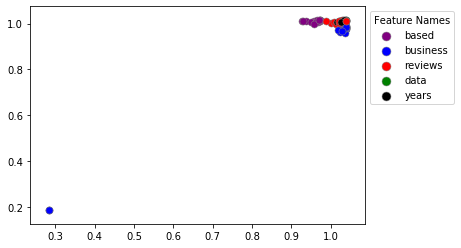

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### plot the clusters
fig, ax = plt.subplots(1,1)

cluster_color_dict = {0:'purple', 1 :'blue', 2 :'red', 3 :'green', 4 :'black'} # change these to desired colors
for i in range(len(t[0])):

    ax.scatter(t[0][i], t[1][i], c= cluster_color_dict[labels[i]], edgecolors='grey', lw = 0.5, s = 50)
    
p1 = [] # legend patches 
for i in range(5):
    print(i)
    h = ax.scatter([],[], c= cluster_color_dict[i], 
                    edgecolors= 'grey', lw = 0.5, s = 80, label = d[i]) 
    p1.append(h)

l1 = ax.legend(handles = p1, title= 'Feature Names',  bbox_to_anchor = (1,1))


In [19]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    

Top terms per cluster:
Cluster 0:
 based
 dr
 evidence
 medicine
 expensive
 task
 ebm
 clinical
 strategy
 decisions
Cluster 1:
 business
 software
 research
 analysis
 et
 al
 content
 studies
 models
 developed
Cluster 2:
 reviews
 systematic
 literature
 evidence
 studies
 provide
 relevant
 identify
 research
 support
Cluster 3:
 data
 time
 knowledge
 citation
 inefficient
 extraction
 approach
 consuming
 exact
 extracting
Cluster 4:
 years
 information
 web
 health
 money
 nowadays
 simple
 say
 mi
 age


In [20]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dfObj1.index.values
cluster_map['cluster'] = model.labels_

In [21]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
1,1,1
2,2,1
5,5,1
6,6,1
7,7,1
9,9,1
16,16,1
24,24,1
26,26,1
30,30,1


In [22]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
3,3,2
4,4,2
13,13,2
22,22,2
28,28,2
29,29,2
32,32,2
35,35,2
40,40,2
41,41,2


In [24]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
11,11,3
19,19,3
25,25,3
27,27,3
33,33,3
37,37,3
45,45,3


In [25]:
%store dfObj1

Stored 'dfObj1' (DataFrame)
